# Getting Started

pyETT: Python library for Eleven VR Table Tennis data.

In [1]:
from pyETT import ett
import pandas as pd

## Player and user search

In order to get player's information we first need to uniquely identify a player. We can use the `user_search()` method of an object of the class `ETT` to search players by username, as follows:

In [2]:
eleven = ett.ETT()
eleven.user_search_dataframe('Highlander').head()

id              name     elo    rank  wins  losses  \
0  248681     Highlandersge  1488.0  361225     0       1   
1  246892     mwwhighlander  1500.0  222424     0       0   
2  218318  .::Highlander::.  1500.0  179327     0       0   
3  166876    The Highlander  1530.0   16962     4       1   
4  384291      highlander10  1500.0   71453     0       0   

                last_online  
0  2021-03-30T17:29:28.963Z  
1  2021-01-02T23:00:36.762Z  
2  2021-01-07T00:52:31.209Z  
3  2020-12-01T20:22:39.752Z  
4  2021-04-16T22:18:26.874Z

Here, the function returns all players that contain the input username string 'Highlander'. To search for a perfect match, we can pass the argument `perfect_match=True`:

In [3]:
eleven.user_search_dataframe('highlanderNJ', perfect_match=True)

id          name     elo  rank  wins  losses               last_online
0  348353  highlanderNJ  2013.5  2042   475     372  2021-06-30T01:53:32.742Z

In this search, we were able to find the player with username 'highlanderNJ' which turns out to be me. We can now instantiate a `Player` object to obtain his information:

In [4]:
print(p:=ett.Player(348353))

highlanderNJ


In [5]:
print(f"username:{p.name}\n elo:{p.elo}\n rank:{p.rank}\n wins:{p.wins}\n losses:{p.losses}\n")

username:highlanderNJ
 elo:2013.5
 rank:2042
 wins:475
 losses:372



We can see I have an Elo number of 2013.5, which puts me ranked in number 2042 in the world with 475 ranked wins and 372 losses. That's not entirely bad as the total number of users around 500,000 players!

## Matches and rounds

Now that we have instantiated a `Player` object, we can obtain his matches using the method `get_matches()` or `get_matches_dataframe()` to obtain the data in a nice pandas dataframe. These methods return ranked matches by default but you can pass the parameters `unranked=True` to obtain unranked matches.

In [6]:
m = p.get_matches_dataframe()
m.head()

created_at       id  ranked  number_of_rounds  state  \
0  2021-06-30T01:34:17.740Z  9837423    True                 3      1   
1  2021-06-24T15:19:50.324Z  9652764    True                 3      1   
2  2021-06-24T15:09:48.858Z  9652464    True                 3      1   
3  2021-06-23T22:33:16.914Z  9631520    True                 3      1   
4  2021-06-23T22:26:44.411Z  9631342    True                 3      1   

   winning_team  losing_team  home_score  away_score     home_player  \
0             0            1           2           1    highlanderNJ   
1             0            1           2           0    highlanderNJ   
2             0            1           2           0    highlanderNJ   
3             0            1           2           1           ilyap   
4             0            1           2           0  LearnerForever   

        away_player                                             rounds  
0  RandomPerson0504  [<pyETT.ett.Match.Round object at 0x7fcc741398...  
1  ZombieEngineerz8  [<pyETT.ett.Match.Round object at 0x7fcc3cdcfe...  
2          mcstives  [<pyETT.ett.Match.Round object at 0x7fcc3cdcf7...  
3      highlanderNJ  [<pyETT.ett.Match.Round object at 0x7fcc3ce160...  
4      highlanderNJ  [<pyETT.ett.Match.Round object at 0x7fcc3ce164...

We can see that my latest ranked match was against the player with username 'RandomPerson0504' and I won the match 2 x 1. In order to obtain the rounds information, we can use the method `get_rounds_dataframe` from the class **Match**, as follows:

In [7]:
ett.Match.get_rounds_dataframe(m.rounds[0])

id  round_number  state  away_score  home_score  winner  \
0  22061114             0      0           8          11       0   
1  22061034             0      0          11           7       1   
2  22060923             0      0           9          11       0   

                 created_at  
0  2021-06-30T01:37:16.546Z  
1  2021-06-30T01:35:59.004Z  
2  2021-06-30T01:34:17.740Z

## Friends list, leaderboard and elo history

From the library, we can also obtain a player's friends list with the method `get_friends()` from an object of the Class **Player**, which also has a corresponding method that returns a list of friends in a pandas dataframe:

In [8]:
p.get_friends_dataframe().head()

id         name     elo    rank  wins  losses               last_online
0   35497      perseph  1626.0   13492  1208    1883  2021-06-20T22:50:59.471Z
1  431729    JoeSixPaK  1804.5    5542   389     654  2021-06-30T02:15:30.270Z
2  495551     77696c6c  1500.0  165378     0       0  2021-06-14T16:21:31.027Z
3  456082     pete_ed5  1796.0    5807   123     128  2021-06-29T22:45:05.229Z
4  249045  Buttersmier  1897.0    3601    80      74  2021-06-28T21:37:01.090Z

I'm interested in comparing my Elo score with my friends'. For that purpose, we can get a player's elo history with the method `get_elo_history()`:

In [9]:
p_elo = p.get_elo_history()
p_elo.head()

elo
2021-02-20T21:13:12.497Z  1500.0
2021-02-24T03:06:30.809Z  1513.0
2021-02-24T03:13:06.512Z  1502.0
2021-02-24T03:16:20.774Z  1489.0
2021-02-24T03:19:46.168Z  1482.0

Let's now pull the Elo history from 5 of my friends and put it all together in a dataframe including my own elo history and then plot them all:

In [10]:
from functools import reduce

n_friends = 5

friends_elo = [f.get_elo_history().rename(columns={"elo":f.name}) for f in 
               p.get_friends()[-n_friends:] if f.get_elo_history() is not None]

friends_elo.append(p.get_elo_history().rename(columns={"elo":p.name}))

group_elo_df = reduce(lambda df1,df2: pd.merge(df1,df2,how='outer', left_index=True, right_index=True), 
                      friends_elo).ffill(axis = 0)

In [11]:
group_elo_df

Konowl77  belmont  Plipplopplip  olofaa  Kennatius  \
2020-12-31T01:14:04.984Z    1500.0      NaN           NaN     NaN        NaN   
2020-12-31T18:45:27.553Z    1493.0      NaN           NaN     NaN        NaN   
2020-12-31T18:50:46.088Z    1476.0      NaN           NaN     NaN        NaN   
2021-01-01T00:34:21.158Z    1468.0      NaN           NaN     NaN        NaN   
2021-01-01T02:38:08.062Z    1453.0      NaN           NaN     NaN        NaN   
...                            ...      ...           ...     ...        ...   
2021-06-30T01:34:17.740Z    1763.8   1907.2        1728.0  1506.0     1652.0   
2021-06-30T01:37:59.877Z    1763.8   1907.2        1733.0  1506.0     1652.0   
2021-06-30T01:44:09.865Z    1763.8   1907.2        1733.0  1506.0     1636.0   
2021-06-30T01:44:57.569Z    1763.8   1907.2        1736.0  1506.0     1636.0   
2021-06-30T01:49:24.921Z    1763.8   1907.2        1749.0  1506.0     1636.0   

                          highlanderNJ  
2020-12-31T01:14:04.984Z           NaN  
2020-12-31T18:45:27.553Z           NaN  
2020-12-31T18:50:46.088Z           NaN  
2021-01-01T00:34:21.158Z           NaN  
2021-01-01T02:38:08.062Z           NaN  
...                                ...  
2021-06-30T01:34:17.740Z        2005.5  
2021-06-30T01:37:59.877Z        2005.5  
2021-06-30T01:44:09.865Z        2005.5  
2021-06-30T01:44:57.569Z        2005.5  
2021-06-30T01:49:24.921Z        2005.5  

[4852 rows x 6 columns]

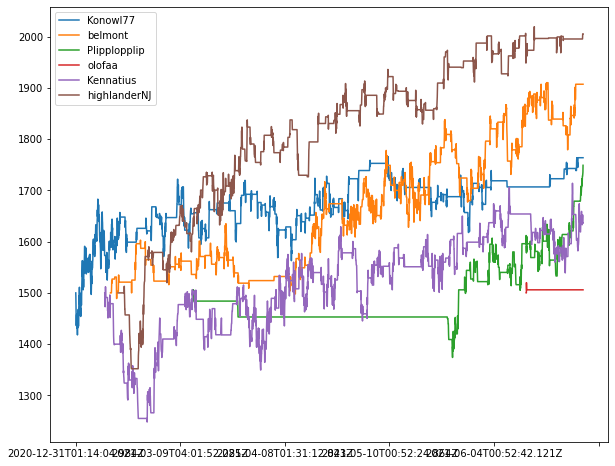

In [12]:
group_elo_df.plot(figsize=(10,8))

Overall, my friends are making some good progress. Everyone seems to be improving over time. 

Now let's take a look at the leaderboard by using the method `get_leaderboard_dataframe()` from our `eleven` object. By default, this method returns the top 10 players. You can pas

In [13]:
eleven.get_leaderboard_dataframe()

https://www.elevenvr.club/leaderboards/?start=0
https://www.elevenvr.club/leaderboards/?start=10


id          name     elo  rank  wins  losses               last_online
0  385684         yedat  3258.2     0   967     258  2021-06-28T19:21:18.464Z
1  347650      PROTT_VR  3095.0     1   662     119  2021-06-22T19:37:25.710Z
2  234850  lapoctopus90  3087.1     2   712     246  2021-06-28T17:55:13.346Z
3  289382     gselvas92  3034.0     3   947     347  2021-06-28T18:12:51.853Z
4  372961     sunking73  2995.5     4   599     251  2021-06-20T11:44:49.214Z
5  428341         NPiet  2995.0     5   979     193  2021-06-25T07:22:35.945Z
6    4410   wurstfriedl  2987.0     6  2208     932  2021-06-28T14:49:11.031Z
7    3831     alexttbcn  2980.0     7  1303     618  2021-06-27T18:11:37.414Z
8   11002   twISTer1979  2978.6     8  2411     931  2021-06-28T17:13:18.551Z
9   20585      fmwallin  2960.0     9  1553     931  2021-06-15T08:53:41.094Z

In [14]:
lb_elo = [f.get_elo_history().rename(columns={"elo":f.name}) for f in 
               eleven.get_leaderboard() if f.get_elo_history() is not None]

lb_elo.append(p.get_elo_history().rename(columns={"elo":p.name}))

lb_elo_df = reduce(lambda df1,df2: pd.merge(df1,df2,how='outer', left_index=True, right_index=True), 
                      lb_elo).ffill(axis = 0)

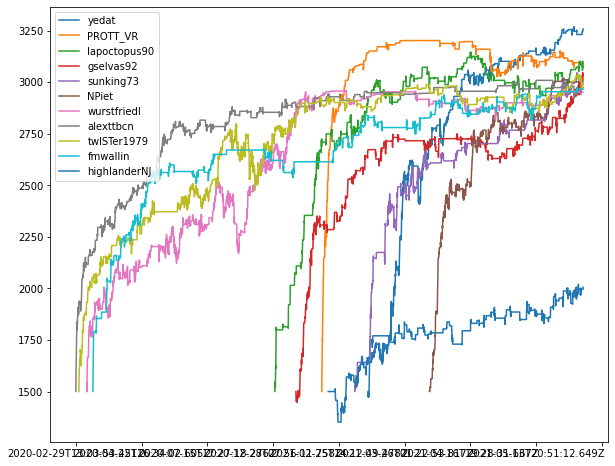

In [15]:
lb_elo_df.plot(figsize=(10,8))

The dynamics are quite different compared to the one from my cohort of friends. At the top of the leaderboard, we observe rapid Elo growth across the board. The Top 2 player (PROTT_VR), for instance, moved from a 1500 Elo to an impressive 3000+ Elo in a very short period of time. The number 1 player (yedat) has recently surpassed PROTT_VR also showing an amazing Elo growth. I have added my Elo evolution for comparison (the little blue curve at the bottom) to give a perspective on how competitive the game is at the highest level.